First importing packages and data, as well as the gaussian we'll use to fit the peaks

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

na_df = pd.read_csv('22Na.csv', skiprows=21)
co_df = pd.read_csv('60Co.csv', skiprows=21)
cs_df = pd.read_csv('137Cs.csv', skiprows=21)
bkg_df = pd.read_csv('bkg.csv', skiprows=21)

channels = na_df['Channel'].to_numpy()      # Only need this once as they're the same for each
na_counts = na_df['Counts'].to_numpy()
co_counts = co_df['Counts'].to_numpy()
cs_counts = cs_df['Counts'].to_numpy()
bkg_counts = bkg_df['Counts'].to_numpy()

na_counts -= bkg_counts
co_counts -= bkg_counts
cs_counts -= bkg_counts

na_counts = na_counts / 1200
co_counts = co_counts / 1200
cs_counts = cs_counts / 1200


def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))

Now histogram each and fit curves to each section, brute force method yay. Don't forget to subtract bkg data

Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
---------------------------------------
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Optimal parameters not found: The maximum number of function evaluations is exceeded.


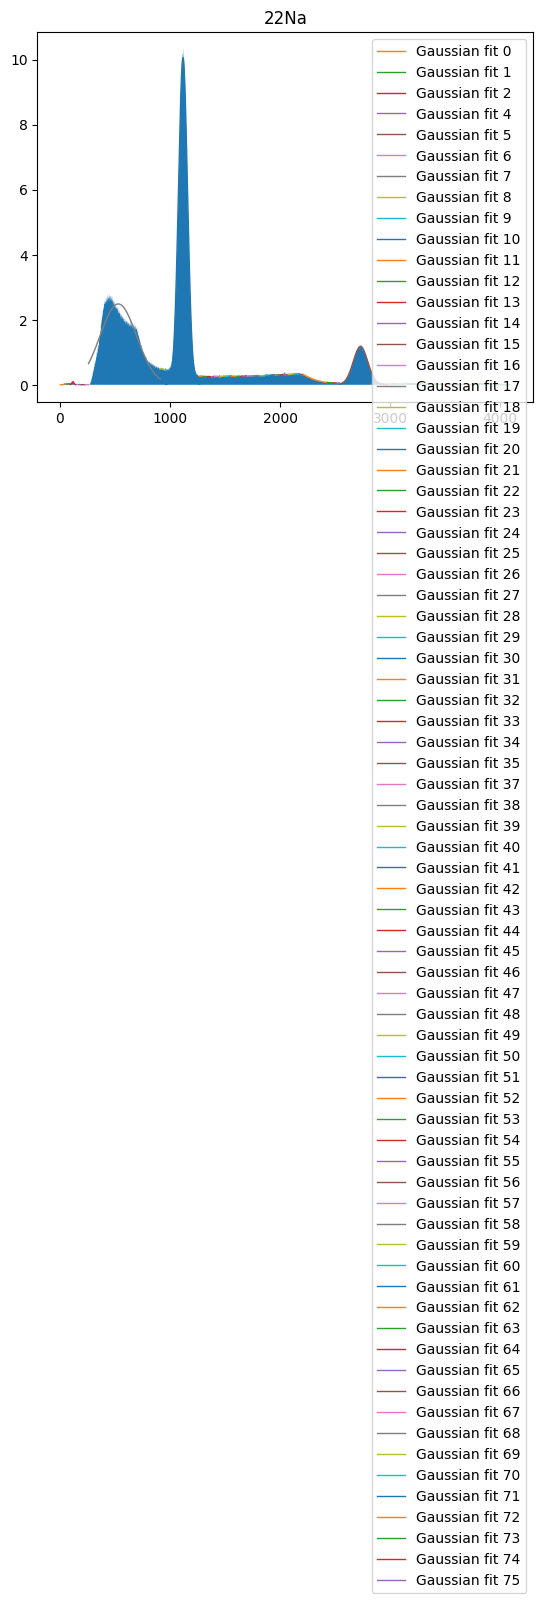

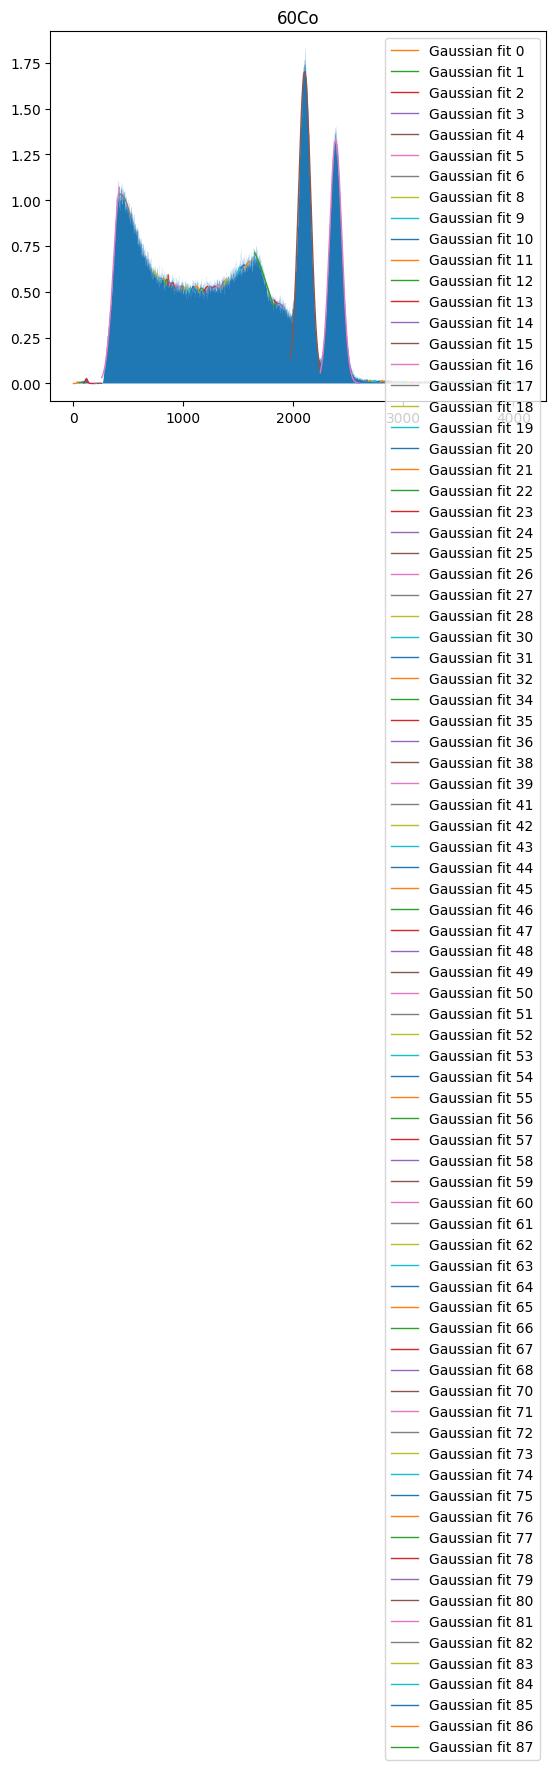

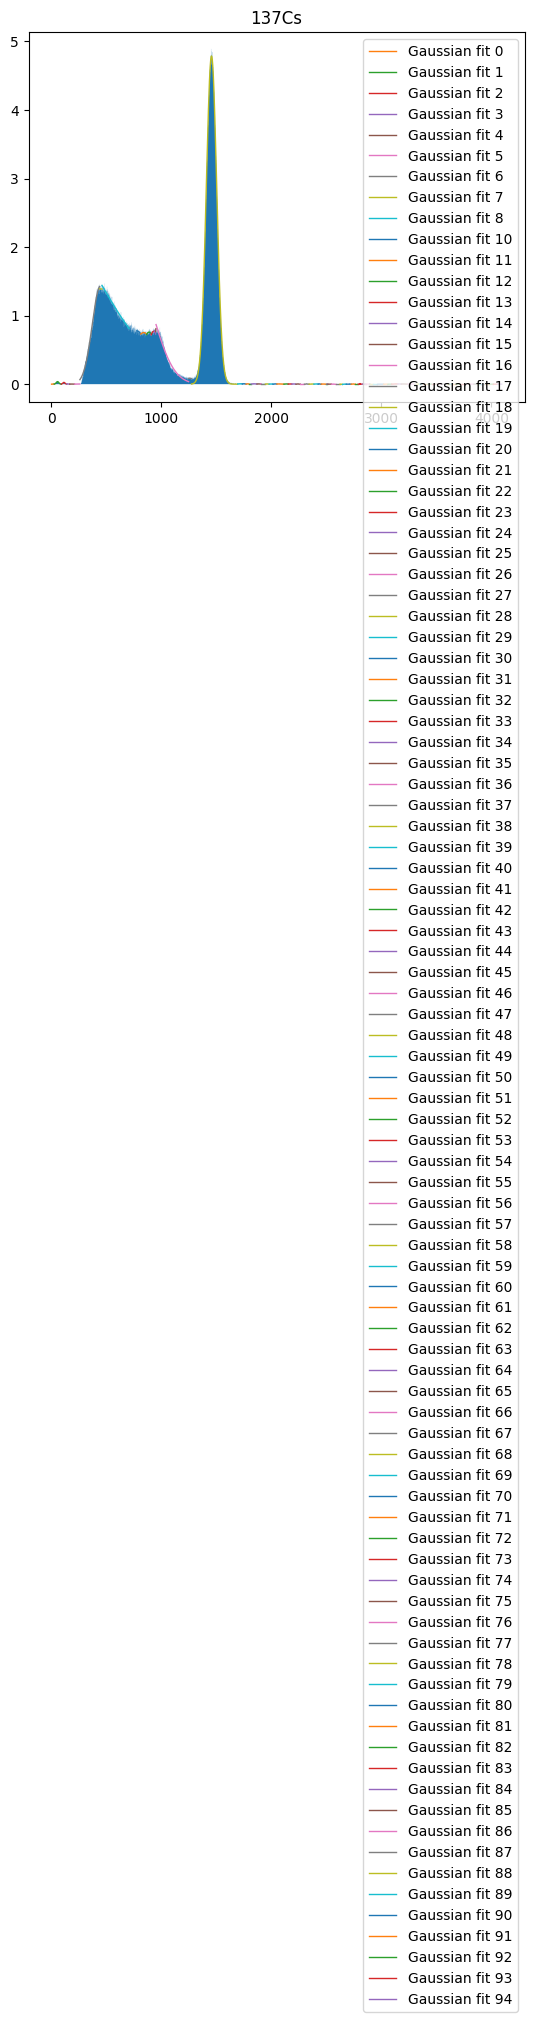

In [9]:

plt.figure()
mplhep.histplot(na_counts, histtype='fill')
plt.title('22Na')

smoothData = scipy.signal.savgol_filter(na_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=na_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        # print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

print('---------------------------------------')
plt.figure()
mplhep.histplot(co_counts, histtype='fill')
plt.title('60Co')

smoothData = scipy.signal.savgol_filter(co_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=co_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        # print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

plt.figure()
mplhep.histplot(cs_counts, histtype='fill')
plt.title('137Cs')

smoothData = scipy.signal.savgol_filter(cs_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=cs_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        # print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')





Na:

Fit: 10
Mu: 1118.1415869195469
Sigma: 40.57413077385624
Amplitude: 1022.7060898229615
Chi Squared per dof: 0.049092466177234124

Fit: 46
Mu: 2730.7020553542784
Sigma: 66.0308014751715
Amplitude: 194.5636206273008
Chi Squared per dof: 0.0007746455303900983

Co: 

Fit: 38
Mu: 2103.7557511692257
Sigma: 55.64468819960899
Amplitude: 237.22176106435452
Chi Squared per dof: 0.005033616598258906

Fit: 39
Mu: 2385.8961531861987
Sigma: 56.02934068530825
Amplitude: 186.49565483636752
Chi Squared per dof: 0.0009065899268583102

Cs:

Fit: 18
Mu: 1456.7453991883492
Sigma: 46.81855601124992
Amplitude: 561.7689214688577
Chi Squared per dof: 0.0020733116701610174



Now the calibration by fitting a straight line

In [22]:
mus = np.array([1118.1415869195469, 2730.7020553542784, 2103.7557511692257, 2385.8961531861987, 1456.7453991883492])        # 22Na, 22Na, 60Co, 60Co, 137Cs
sigmas = np.array([40.57413077385624, 66.0308014751715, 55.64468819960899, 56.02934068530825, 46.81855601124992])

energies = np.array([511, 1274.537, 1173.228, 1332.492, 661.657])

def linear(x, m, c):
    return m*x+c

popt, pcov = curve_fit(linear, energies, mus, [1,1], sigma=sigmas, absolute_sigma=True)
stDev = np.sqrt(np.diag(pcov))

print(popt)
print(f'Energy of last bin: {(4096 - popt[1]) / popt[0]}')

[  1.64999338 305.72931619]
Energy of last bin: 2297.142970057557


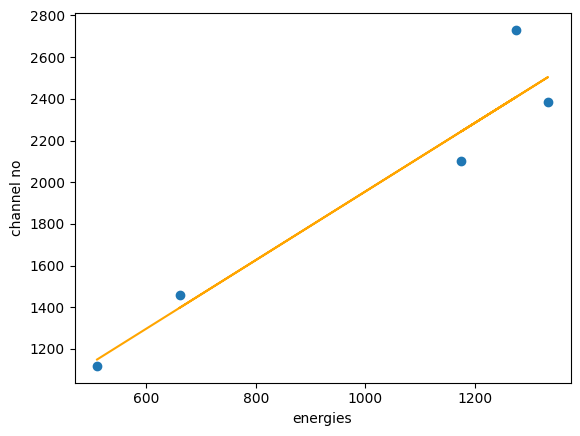

In [23]:
plt.figure()
plt.scatter(energies, mus)
plt.xlabel('energies')
plt.ylabel('channel no')
plt.plot(energies, popt[0]*energies + popt[1], color='orange')
